# Tech Challenge - FIAP: IA para Devs (Fase 1)

###Grupo 38
- Pedro Vianna Silveira
- Rafael Silva Souza
- Rodrigo de Freitas Ornellas



### 🔗 Código Github

---


https://github.com


### 🔗 Vídeo de apresentação
https://www.youtube.com   

---

## 1. Introdução

### 1.1. Descrição do Problema

O aumento dos custos de saúde é uma preocupação global que afeta indivíduos e empresas. As seguradoras de saúde, em particular, enfrentam o desafio de prever os custos médicos de seus segurados para precificar seus produtos de forma justa e competitiva, além de garantir a sustentabilidade financeira. Para abordar essa questão, é essencial desenvolver modelos preditivos que possam estimar os custos médicos individuais com base em diversas características dos segurados.

### 1.2. Objetivo do Projeto

O objetivo deste projeto é desenvolver um modelo preditivo de regressão para prever os custos médicos individuais cobrados pelo seguro de saúde. A base de dados fornecida contém informações demográficas e comportamentais dos segurados, como idade, gênero, índice de massa corporal (IMC), número de filhos, se é fumante, região e os encargos médicos.

### 1.3. Metodologia

Para atingir nosso objetivo, seguiremos um conjunto estruturado de etapas, que incluem:

1. **Exploração de Dados**:
   - Carregar a base de dados e explorar suas características.
   - Analisar estatísticas descritivas e visualizar distribuições relevantes.

2. **Pré-processamento de Dados**:
   - Realizar a limpeza dos dados, tratando valores ausentes (se necessário).
   - Converter variáveis categóricas em formatos adequados para modelagem.

3. **Modelagem**:
   - Criar um modelo preditivo de regressão utilizando uma técnica à nossa escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).
   - Dividir o conjunto de dados em conjuntos de treinamento e teste.

4. **Treinamento e Avaliação do Modelo**:
   - Treinar o modelo com o conjunto de treinamento.
   - Avaliar o desempenho do modelo utilizando métricas como MAE, RMSE e R².

5. **Validação Estatística**:
   - Utilizar métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

6. **Apresentação dos Resultados**:
   - Apresentar resultados visuais, como gráficos de previsões vs. valores reais.
   - Elaborar um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

### 1.4. Resultados Esperados

Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas. O sucesso do modelo será medido pela precisão das previsões em relação aos valores reais, avaliada por meio das métricas de erro mencionadas anteriormente. Além disso, o relatório final deve proporcionar uma compreensão clara dos fatores que influenciam os custos médicos, bem como possíveis melhorias para o modelo.

### 1.5. Estrutura do Notebook

O notebook será estruturado da seguinte maneira:

1. **Introdução**: Explicação do problema, objetivos e metodologia.
2. **Exploração de Dados**: Carregamento e análise descritiva dos dados.
3. **Pré-processamento de Dados**: Limpeza e transformação dos dados.
4. **Modelagem**: Criação e treinamento do modelo preditivo.
5. **Avaliação do Modelo**: Avaliação do desempenho do modelo.
6. **Validação Estatística**: Verificação da significância dos resultados.
7. **Apresentação dos Resultados**: Visualização e interpretação dos resultados.
8. **Conclusão**: Discussão dos resultados e considerações finais.

---

## 2. Exploração de Dados

### 2.1. Carregamento e Visualização Inicial

Nesta seção, carregaremos a base de dados e exploraremos suas características básicas.

In [2]:
# Código para carregar o dataset
import pandas as pd

# Carregar o dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.2. Análise Descritiva

Analisaremos estatísticas descritivas e visualizaremos distribuições relevantes.

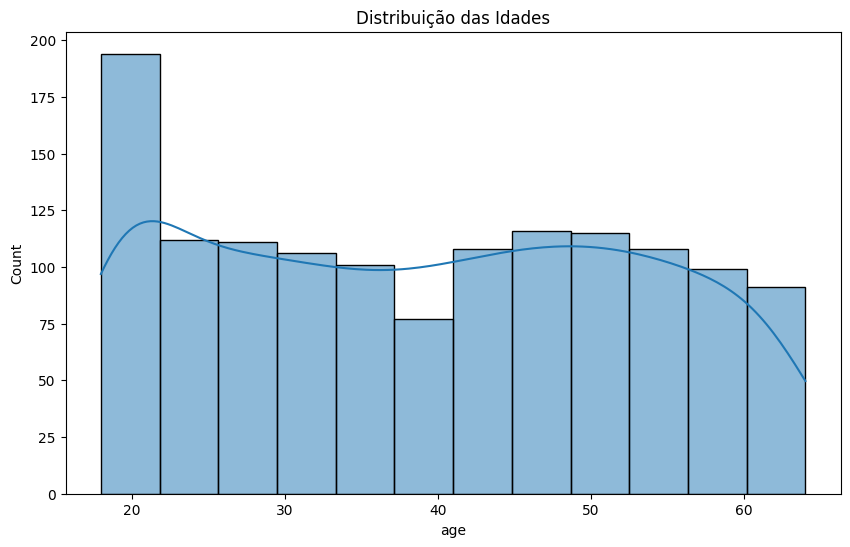

In [4]:
# Código para análise descritiva
df.describe()

# Visualização das distribuições
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma das idades
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribuição das Idades')
plt.show()

---

##3. Pré-processamento de Dados
##3.1. Limpeza de Dados
Vamos tratar valores ausentes e remover outliers, se necessário.

In [7]:
# Código para tratamento de valores ausentes
df.isnull().sum()

# Tratamento de outliers (se necessário)
# Exemplo: Removendo outliers baseados no IQR
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

##3.2. Conversão de Variáveis Categóricas
Transformaremos variáveis categóricas para um formato adequado para modelagem.

In [8]:
# Código para conversão de variáveis categóricas
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

___

##4. Modelagem
###4.1. Divisão dos Dados
Dividiremos o conjunto de dados em conjuntos de treinamento e teste.

In [9]:
# Código para divisão dos dados
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##4.2. Treinamento do Modelo
Criaremos e treinaremos o modelo preditivo de regressão.

In [10]:
# Código para treinamento do modelo
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

___

##5. Treinamento e Avaliação do Modelo
###5.1. Avaliação do Desempenho
Utilizaremos métricas como RMSE, MAE e R² para avaliar a performance do modelo.

In [11]:
# Código para avaliação do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 2672.4139226145717
RMSE: 4384.059307043479
R²: 0.5980165384315913


___

##6. Validação Estatística
###6.1. Intervalos de Confiança e P-valores
Calcularemos intervalos de confiança e p-valores para validar a significância dos resultados.

In [15]:
import statsmodels.api as sm
import numpy as np

# Adicionar constante para o modelo de statsmodels
X_train_sm = sm.add_constant(X_train)

# Garantir que todos os dados sejam numéricos e convertidos para o formato correto
X_train_sm = np.asarray(X_train_sm).astype(np.float64)
y_train = np.asarray(y_train).astype(np.float64)

# Ajustar o modelo de regressão
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Imprimir o resumo do modelo
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     178.3
Date:                Sat, 25 May 2024   Prob (F-statistic):          6.01e-183
Time:                        14:36:18   Log-Likelihood:                -9404.8
No. Observations:                 954   AIC:                         1.883e+04
Df Residuals:                     945   BIC:                         1.887e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1696.2200    388.597      4.365      0.0

___

##7. Apresentação dos Resultados
###7.1. Visualização dos Resultados
Apresentaremos os gráficos de previsões vs. valores reais e outros gráficos relevantes.

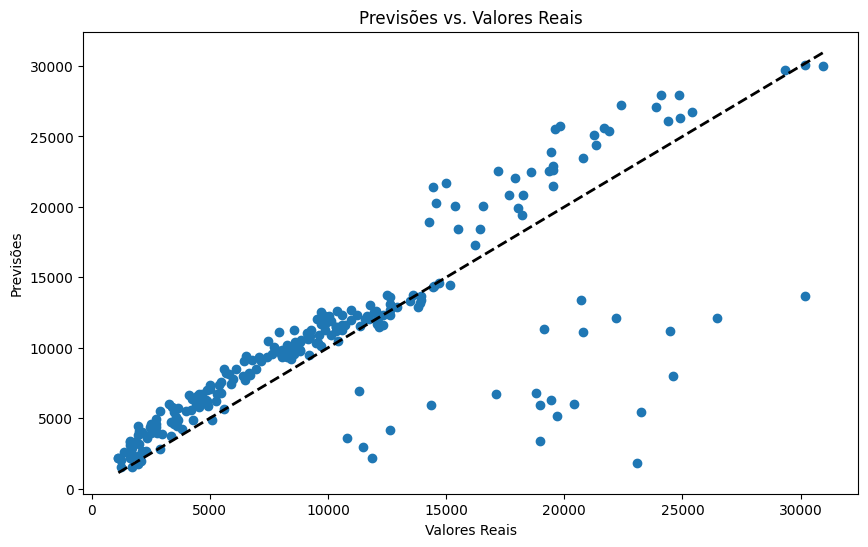

In [16]:
# Código para visualização dos resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.show()

___

##8. Conclusão
###8.1. Discussão dos Resultados
Interpretaremos os resultados, discutindo as limitações e possíveis melhorias.

###8.2. Considerações Finais
Resumiremos os principais achados e implicações práticas do projeto.